<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#The-Loans" data-toc-modified-id="The-Loans-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Loans</a></span><ul class="toc-item"><li><span><a href="#Loan-amount" data-toc-modified-id="Loan-amount-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loan amount</a></span><ul class="toc-item"><li><span><a href="#Loan-amount-and-founded-amount" data-toc-modified-id="Loan-amount-and-founded-amount-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Loan amount and founded amount</a></span></li><li><span><a href="#Less-funded-loan-and-fully-funded-loan" data-toc-modified-id="Less-funded-loan-and-fully-funded-loan-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Less-funded loan and fully-funded loan</a></span></li><li><span><a href="#Loan-amount-and-country" data-toc-modified-id="Loan-amount-and-country-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Loan amount and country</a></span></li><li><span><a href="#Loan-amount-and-borrower-gender" data-toc-modified-id="Loan-amount-and-borrower-gender-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Loan amount and borrower gender</a></span><ul class="toc-item"><li><span><a href="#Borrower-gender-group" data-toc-modified-id="Borrower-gender-group-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>Borrower gender group</a></span></li><li><span><a href="#Total-loan-amount,-average-loan-amount,-average-funded-loan-ratio-by-gender-group" data-toc-modified-id="Total-loan-amount,-average-loan-amount,-average-funded-loan-ratio-by-gender-group-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>Total loan amount, average loan amount, average funded-loan ratio by gender group</a></span></li></ul></li><li><span><a href="#Loan-amount-and-sector" data-toc-modified-id="Loan-amount-and-sector-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Loan amount and sector</a></span><ul class="toc-item"><li><span><a href="#Sector-and-activity" data-toc-modified-id="Sector-and-activity-2.1.5.1"><span class="toc-item-num">2.1.5.1&nbsp;&nbsp;</span>Sector and activity</a></span></li><li><span><a href="#Loan-amount-by-sector" data-toc-modified-id="Loan-amount-by-sector-2.1.5.2"><span class="toc-item-num">2.1.5.2&nbsp;&nbsp;</span>Loan amount by sector</a></span></li></ul></li><li><span><a href="#Loan-amount-and-term-in-months" data-toc-modified-id="Loan-amount-and-term-in-months-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Loan amount and term in months</a></span></li><li><span><a href="#Funded-amount-and-lender-count" data-toc-modified-id="Funded-amount-and-lender-count-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Funded amount and lender count</a></span></li></ul></li><li><span><a href="#Repayment-interval" data-toc-modified-id="Repayment-interval-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Repayment interval</a></span></li><li><span><a href="#Posted-time,-funded-time,-and-fully-funded-days" data-toc-modified-id="Posted-time,-funded-time,-and-fully-funded-days-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Posted time, funded time, and fully-funded days</a></span></li></ul></li></ul></div>

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
import missingno as msno
import seaborn as sns
sns.set()

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
loans_df = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/loans_df_DW.cvs',parse_dates=['posted_time', 'funded_time'])
mpi_df = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/mpi_df_DW.cvs')

In [4]:
mpi_2020 = pd.read_excel('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/RawData/AdditionalData/mpi_2020.xlsx')

## The Loans

In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671204 entries, 0 to 671203
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  671204 non-null  int64         
 1   funded_amount       671204 non-null  float64       
 2   loan_amount         671204 non-null  float64       
 3   activity            671204 non-null  object        
 4   sector              671204 non-null  object        
 5   use                 671204 non-null  object        
 6   ISO                 671204 non-null  object        
 7   country             671204 non-null  object        
 8   region              614405 non-null  object        
 9   partner_id          657698 non-null  float64       
 10  posted_time         671204 non-null  datetime64[ns]
 11  funded_time         622873 non-null  datetime64[ns]
 12  term_in_months      671204 non-null  float64       
 13  lender_count        671204 no

In [6]:
loans_df.head()

,id,funded_amount,loan_amount,activity,sector,use,ISO,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,funded_loan_ratio,fully_funded_days
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PAK,Pakistan,Lahore,247.0,2014-01-01 06:12:39,2014-01-02 10:06:32,12.0,12,No_tag,female,irregular,1.0,1.162419
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PAK,Pakistan,Lahore,247.0,2014-01-01 06:51:08,2014-01-02 09:17:23,11.0,14,No_tag,female,irregular,1.0,1.101562
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IND,India,Maynaguri,334.0,2014-01-01 09:58:07,2014-01-01 16:01:36,43.0,6,"user_favorite, user_favorite",female,bullet,1.0,0.252419
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PAK,Pakistan,Lahore,247.0,2014-01-01 08:03:11,2014-01-01 13:00:00,11.0,8,No_tag,female,irregular,1.0,0.206123
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PAK,Pakistan,Abdul Hakeem,245.0,2014-01-01 11:53:19,2014-01-01 19:18:51,14.0,16,No_tag,female,monthly,1.0,0.309398


In [7]:
loans_df[loans_df.partner_id.isna()].country.value_counts()

Kenya             8372
United States     5063
Puerto Rico         68
Virgin Islands       2
Guam                 1
Name: country, dtype: int64

In [8]:
(loans_df.country=='United States').sum()

6092

### Loan amount 

#### Loan amount and founded amount

In [9]:
loans_df[['funded_amount', 'loan_amount', 'funded_loan_ratio']].describe()

,funded_amount,loan_amount,funded_loan_ratio
count,671204.000000,671204.000000,671204.000000
mean,785.993252,842.395382,0.960561
std,1130.398812,1198.660133,0.158879
min,0.000000,25.000000,0.000000
25%,250.000000,275.000000,1.000000
50%,450.000000,500.000000,1.000000
75%,900.000000,1000.000000,1.000000
max,100000.000000,100000.000000,1.130000


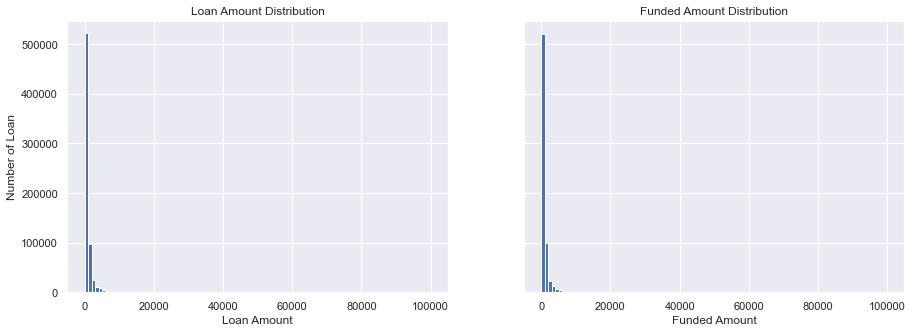

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5),  sharey=True)

# loan amount distribution
axes[0].hist(loans_df.loan_amount, bins=100)
axes[0].set_title('Loan Amount Distribution')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Number of Loan')

# funded amount distribution
axes[1].hist(loans_df.funded_amount, bins=100)
axes[1].set_title('Funded Amount Distribution')
_ = axes[1].set_xlabel('Funded Amount')


The mean and median of `funded_amount` and `loan_amount` are less than \$1000, while the maximum is up high to \\$100,000, which means `funded_amount` and `loan_amount` are both right skewed. We will check the log distribution of the both variables.

In [11]:
# Take the logarithm of funded amount 
# Zero value will lead to negtive infinit when taking logarithm
funded_amount_log = np.log10(loans_df[loans_df.funded_amount != 0].funded_amount)

# Take the logarithm of loan amount with non-zero funded amount
loan_amount_log = np.log10(loans_df[loans_df.funded_amount != 0].loan_amount)

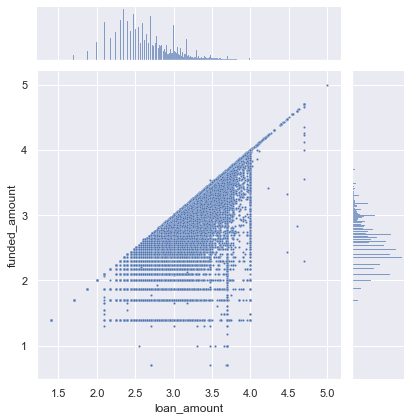

In [12]:
# The relationship of loan anoumt and funded amount
_ = sns.jointplot(x=loan_amount_log, y=funded_amount_log, joint_kws=dict(s=5))

The distribution looks much better when taking logarithm. All the data points under the diagonal mean the not-fully-funded loans. Actually, not-fully-funded rate is fairly low on Kiva platform. Let's check it.

In [13]:
not_fully_funded_rate = (loans_df.funded_loan_ratio < 1).mean()
print('About {:.1%} loans did not get full fund.'.format(not_fully_funded_rate))

About 7.2% loans did not get full fund.


#### Less-funded loan and fully-funded loan

In [14]:
less_funded = loans_df[loans_df.funded_loan_ratio < 1].loan_amount
fully_funded = loans_df[loans_df.funded_loan_ratio == 1].loan_amount
less_and_fully = pd.merge(less_funded, fully_funded, left_index=True, right_index=True, how='outer', suffixes=('_less_funded','_fully_funded'))
less_and_fully.describe()

,loan_amount_less_funded,loan_amount_fully_funded
count,48325.000000,622877.000000
mean,1409.735127,798.376405
std,1596.728773,1150.454446
min,25.000000,25.000000
25%,600.000000,250.000000
50%,1000.000000,450.000000
75%,1500.000000,900.000000
max,50000.000000,100000.000000


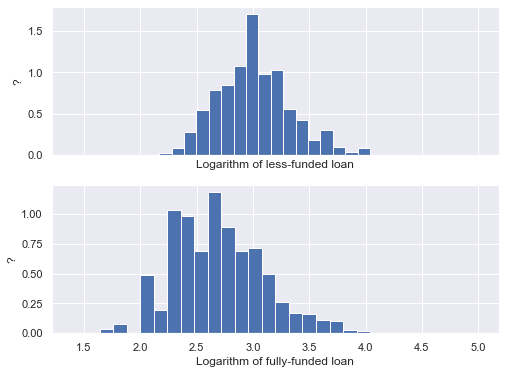

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), sharex=True)

axes[0].hist(np.log10(less_funded), bins=30, density=True)
axes[0].set_ylabel('?')
axes[0].set_xlabel('Logarithm of less-funded loan')

axes[1].hist(np.log10(fully_funded), bins=30, density=True)
axes[1].set_ylabel('?')
_ = axes[1].set_xlabel('Logarithm of fully-funded loan')

Comparing with the loans that were fully funded, the mean, median, and standard deviation of the not-fully funded loans are higher. Does that mean the funded-loan ratio and loan amount are linearly related?

In [16]:
# Calculate coorelation coefficient of funded-loan ratio and loan amount
np.corrcoef(loans_df.funded_loan_ratio, loans_df.loan_amount)

array([[ 1.        , -0.12172255],
       [-0.12172255,  1.        ]])

The correlation coefficient is negative, but there is no strong liner relationship between the two variables since the less-funded rate is fairly low.

Is there any loans which was over-funded? Let's check it for curiosity.

In [17]:
loans_df[loans_df.funded_amount > loans_df.loan_amount]

,id,funded_amount,loan_amount,activity,sector,use,ISO,country,region,partner_id,posted_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,funded_loan_ratio,fully_funded_days
277188,924149,425.0,400.0,General Store,Retail,"to buy beverages, rice, laundry detergent, sug...",MOZ,Mozambique,"Boane, Maputo",23.0,2015-07-28 07:14:04,NaT,17.0,11,"#Parent, user_favorite",male,monthly,1.06,14.735880
338159,985199,3400.0,3000.0,Farm Supplies,Agriculture,"to pay for wires for the grape orchard, cover ...",ARM,Armenia,"Hoktember village, Armavir region",169.0,2015-11-25 10:53:00,NaT,38.0,84,"#Elderly, #Job Creator, #Trees, #Vegan, user_f...",male,monthly,1.13,17.948843


Lucky two :)

####  Loan amount and country

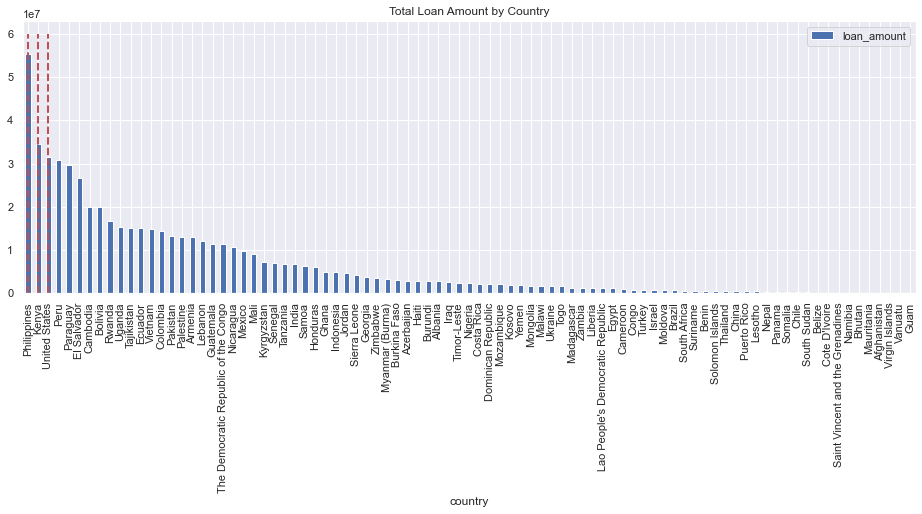

In [18]:
# Group the total loan amount and funded amount by country
amount_sum_by_country = loans_df.groupby('country').sum()[['loan_amount','funded_amount']].reset_index()

# Plot the total loan amount by country
amount_sum_by_country = amount_sum_by_country.sort_values(by='loan_amount', ascending=False)
ax=amount_sum_by_country.plot(y='loan_amount', x='country',kind='bar')
plt.gcf().set_size_inches(16, 5)
plt.title('Total Loan Amount by Country')
_ = plt.vlines(x=np.array([0,1,2]), ymin=0, ymax=6e7, color='r', linewidths=2, linestyles='dashed')

The top three countries who applied for the most loans amount are Philippines, Kenya, and United States. But does the high total loan amount result from the large number of loans or high average loan amount? Let's check the number of loans and the average loan amount by county.

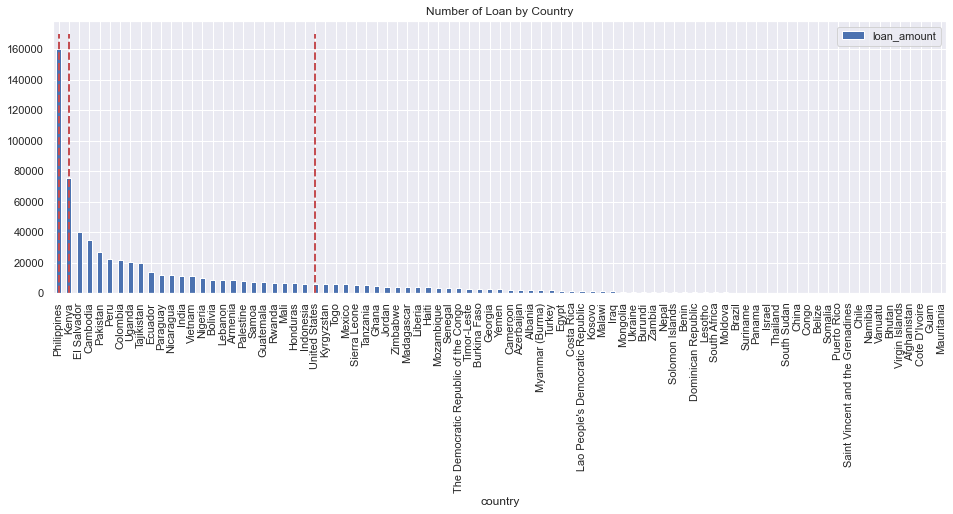

In [19]:
# Group the number of loans by country
number_of_loans_by_country = loans_df.groupby('country').count()['loan_amount'].reset_index()
number_of_loans_by_country = number_of_loans_by_country.sort_values(by='loan_amount', ascending=False)

# plot the number of loans by country
number_of_loans_by_country.plot(y='loan_amount', x='country',kind='bar')
plt.gcf().set_size_inches(16, 5)
plt.title('Number of Loan by Country')
_ = plt.vlines(x=np.array([0,1,25]), ymin=0, ymax=170000, color='r', linewidths=2, linestyles='dashed')

Philippines and Kenya were still the top two countries with the largest number of loans, while the number of loans of the United States ranked behind the 20th. 

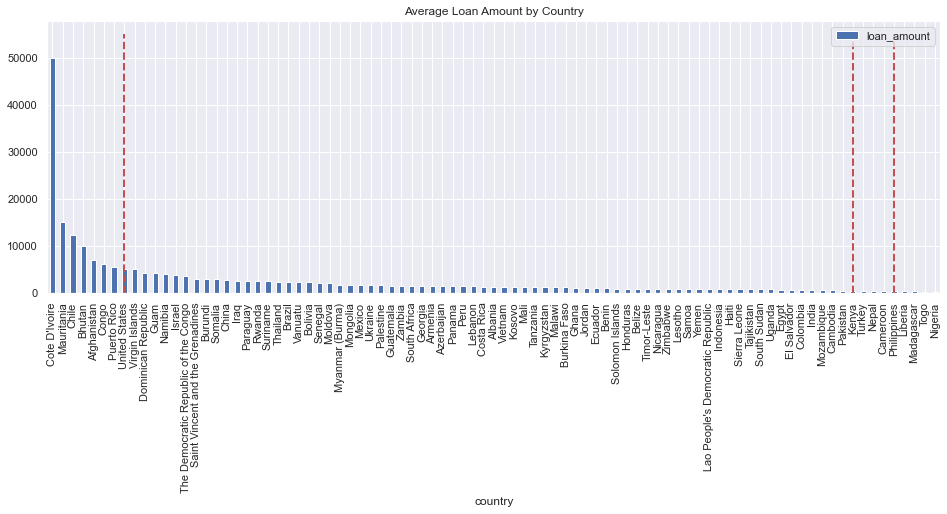

In [20]:
# Group the average loan amount by country
amount_mean_by_country = loans_df.groupby('country').mean()[['loan_amount','funded_amount']].reset_index()
amount_mean_by_country = amount_mean_by_country.sort_values(by='loan_amount', ascending=False)


amount_mean_by_country.plot(y='loan_amount', x='country',kind='bar')
plt.gcf().set_size_inches(16, 5)
plt.title('Average Loan Amount by Country')
_ = plt.vlines(x=np.array([7,78,82]), ymin=0, ymax=55000, color='r', linewidths=2, linestyles='dashed')

The average loan amount is very low for Philippines and Kenya, but pretty high for the United States.

How about the the ratio of funded amount and loan amount.

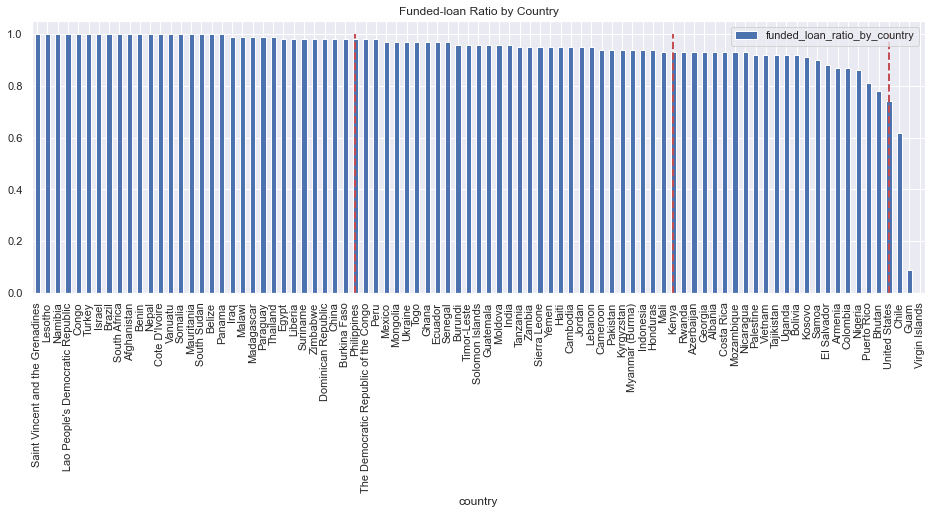

In [21]:
# Add the ratio of total funded amount and loan amount by country
amount_sum_by_country['funded_loan_ratio_by_country'] = (amount_sum_by_country.funded_amount / amount_sum_by_country.loan_amount).round(2)
ratio_by_country = amount_sum_by_country.sort_values(by='funded_loan_ratio_by_country', ascending=False)

ratio_by_country.plot(y='funded_loan_ratio_by_country', x='country',kind='bar')
plt.gcf().set_size_inches(16, 5)
plt.title('Funded-loan Ratio by Country')
_ = plt.vlines(x=np.array([31,62,83]), ymin=0, ymax=1, color='r', linewidths=2, linestyles='dashed')


As we can see above, the funded-loan ratio of Philippines is pretty high, while the ratio of United Sates is significantly low. 

#### Loan amount and borrower gender

Similarly, we will check the number of loans, the loan amount and the funded-loan ratio by borrower genders.

##### Borrower gender group

In [22]:
loans_df.borrower_genders.unique()

array(['female', 'male', 'mixed', 'unknown'], dtype=object)

We have grouped borrower genders in data wrangling, so there are four groups of borrowers by gender, i.e., female, male, mixed, and unknown.

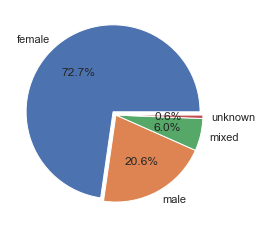

In [23]:
# The number of loans by borrower gender
labels = loans_df.borrower_genders.value_counts().index
sizes = loans_df.borrower_genders.value_counts()
explode = (0.05, 0, 0, 0)  
_ = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')

Most loan borrowers came from female group, including single female and multiple females. Let's check the total loan amount, the average loan amount and the average funded-loan ratio by gender group

##### Total loan amount, average loan amount, average funded-loan ratio by gender group

                  loan_amount_sum  loan_amount_mean  funded_loan_ratio_mean
borrower_genders                                                           
female                356534900.0        730.484552                0.973918
male                  126923000.0        916.259394                0.916027
mixed                  77007250.0       1907.064141                0.961257
unknown                 4954000.0       1173.655532                0.870917


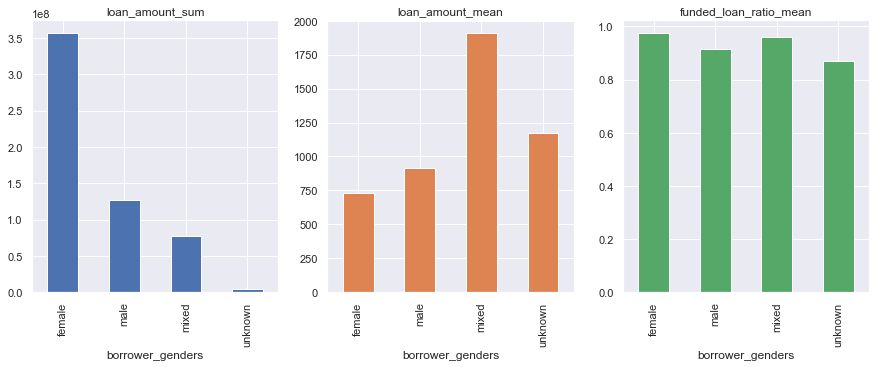

In [24]:
# Total loan amount by gender
sum_by_gender = loans_df.groupby('borrower_genders').sum()[['loan_amount']]
# Average loan amount and funded-loan ratio by gender
mean_by_gender = loans_df.groupby('borrower_genders').mean()[['loan_amount', 'funded_loan_ratio']]
# Join two dataframe and rename
loan_by_gender = sum_by_gender.join(mean_by_gender, how='outer', lsuffix='_sum', rsuffix='_mean')
loan_by_gender.rename({'funded_loan_ratio':'funded_loan_ratio_mean'}, axis=1, inplace=True)
print(loan_by_gender)

# Plot and compare
axes = loan_by_gender[['loan_amount_sum', 'loan_amount_mean', 'funded_loan_ratio_mean']].plot.bar(subplots=True, layout=(1, 3), legend=None)
plt.gcf().set_size_inches(15,5)


The total amount of loans borrowed from female group was much larger than the other gender groups, but the average loan amount of female group was smaller than all the others. The funded-loan ratio of female group and mixed group are higher than male group and unknown group.

#### Loan amount and sector

##### Sector and activity

In [25]:
loans_df[['sector', 'activity']].describe()

,sector,activity
count,671204,671204
unique,15,163
top,Agriculture,Farming
freq,180302,72955


In [26]:
loans_df.groupby('sector').activity.value_counts()

sector          activity          
Agriculture     Farming               72955
                Agriculture           27023
                Pigs                  26624
                Livestock             13095
                Poultry                9783
                                      ...  
Transportation  Transportation         4121
                Rickshaw               2878
                Taxi                   2631
Wholesale       Wholesale               357
                Goods Distribution      277
Name: activity, Length: 163, dtype: int64

There are totally 15 sectors with 163 activity types. The most common sector is Agriculture, and the most common activity is Farming, which belongs to Agriculture sector. We will only check the relationships between loan amount, funded amount and sector.

##### Loan amount by sector

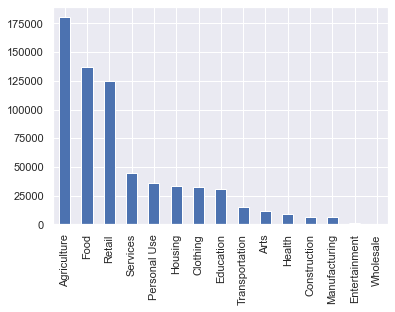

In [27]:
# The number of loans by sector
_ = loans_df.sector.value_counts().plot.bar()

Top 3

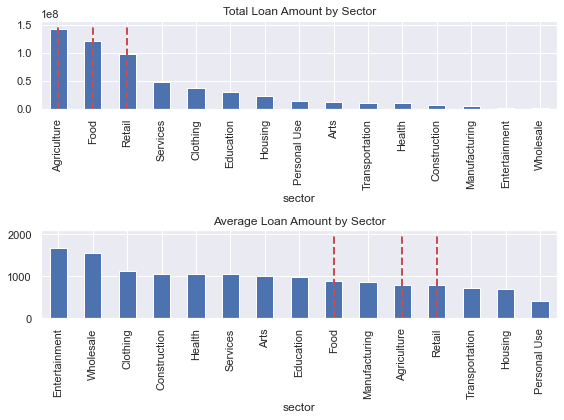

In [28]:
# Group the total loan amount and funded amount by country
amount_sum_by_sector = loans_df.groupby('sector').sum()[['loan_amount','funded_amount']].reset_index()
amount_sum_by_sector = amount_sum_by_sector.sort_values(by='loan_amount', ascending=False)


# Group the average loan amount by country
amount_mean_by_sector = loans_df.groupby('sector').mean()[['loan_amount']].reset_index()
amount_mean_by_sector = amount_mean_by_sector.sort_values(by='loan_amount', ascending=False)



# Plot the total loan amount by country
fig, axes = plt.subplots(2, 1, figsize=(8,6))
fig.tight_layout()


amount_sum_by_sector.plot(ax=axes[0], y='loan_amount', x='sector', kind='bar', legend=False)
axes[0].set_title('Total Loan Amount by Sector')
axes[0].vlines(x=np.array([0,1,2]), ymin=0, ymax=1.5e8, color='r', linewidths=2, linestyles='dashed')
#axes[0].invert_yaxis()

amount_mean_by_sector.plot(ax=axes[1], y='loan_amount', x='sector',kind='bar', legend=False)
axes[1].set_title('Average Loan Amount by Sector')
axes[1].vlines(x=np.array([8,10,11]), ymin=0, ymax=2000, color='r', linewidths=2, linestyles='dashed')
#_ = axes[1].invert_yaxis()

fig.tight_layout()

By total loan amount, Agriculture, Food, and Retail are the top 3 sectors, while the top three sectors with the largest average loan amount are Entertainment, Wholesale, and Clothing. It's a little bit surprising for me that people apply for loan for entertainment. So let's check what the loans were used for and where the borrowers came from.

In [29]:
# The activities under the Entertainment sector
loans_df[loans_df.sector=='Entertainment'].activity.value_counts()

Entertainment          443
Games                  238
Musical Performance    149
Name: activity, dtype: int64

In [30]:
# The sample of loans under Entertainment sector
pd.set_option('display.max_colwidth', None)
loans_df[loans_df.sector=='Entertainment'].use.sample(10)


218951                                                                                                 produce a pilot of the television show Alien Coffee.
218315                                                                                                     to buy an additional organ for teaching lessons.
263491                                                                                                 to buy a new pool table to service his other center.
275816                                                                          to purchase spare parts for maintenance and add one unit of videoke machine
358506                                                  to purchase a reaction injection mold to create our own game shells and cases to package new games.
144524                                              get insurance, buy better and lighter equipment to perform on weekends and launch a marketing campaign.
255512    A Kiva Zip loan will help me to finish building my com

In [31]:
# The top ten countries where the borrowers applied for loans under Entertainment sector
loans_df[loans_df.sector=='Entertainment'].country.value_counts()[:11]

United States    183
Philippines      139
Colombia          91
Samoa             43
Peru              38
Kenya             32
Lebanon           28
Uganda            28
Pakistan          27
Palestine         22
Bolivia           20
Name: country, dtype: int64

The loans under Entertainment sector are generally used for business, and mainly from United States, Philippines, and Colombia.

#### Loan amount and term in months

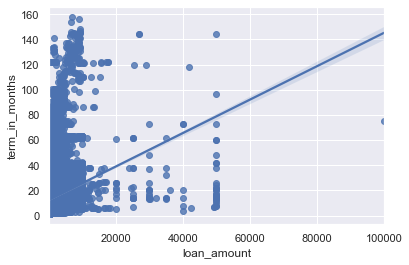

In [32]:
sns.regplot(x='loan_amount', y='term_in_months', data=loans_df)

In [33]:
np.corrcoef(loans_df.loan_amount, loans_df.term_in_months)

array([[1.        , 0.18479448],
       [0.18479448, 1.        ]])

In [34]:
PHL_loan = loans_df[loans_df.ISO == 'PHL'][['country', 'loan_amount', 'term_in_months']]
KEN_loan = loans_df[loans_df.ISO == 'KEN'][['country', 'loan_amount', 'term_in_months']]
USA_loan = loans_df[loans_df.ISO == 'USA'][['country', 'loan_amount', 'term_in_months']]

The correlation coefficient of Philippines is 0.11
The correlation coefficient of Kenya is 0.2
The correlation coefficient of United States is 0.71


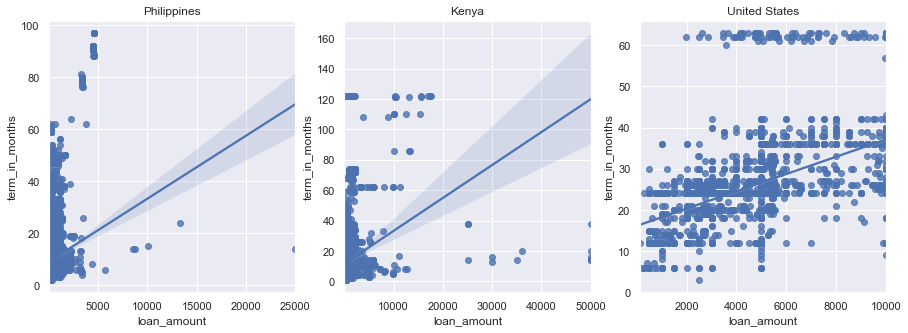

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

loan_list = [PHL_loan, KEN_loan, USA_loan]
for i in range(len(loan_list)):
    sns.regplot(x='loan_amount', y='term_in_months', data=loan_list[i], ax=axes[i])
    axes[i].set_title(loan_list[i].country.unique().item())
    corrcoef = np.corrcoef(loan_list[i].loan_amount, loan_list[i].term_in_months)
    print('The correlation coefficient of {} is {}'.format(loan_list[i].country.unique().item(), round(corrcoef[0,1],2)))


#### Funded amount and lender count

In [36]:
loans_df.lender_count.describe()

count    671204.000000
mean         20.590895
std          28.459563
min           0.000000
25%           7.000000
50%          13.000000
75%          24.000000
max        2986.000000
Name: lender_count, dtype: float64

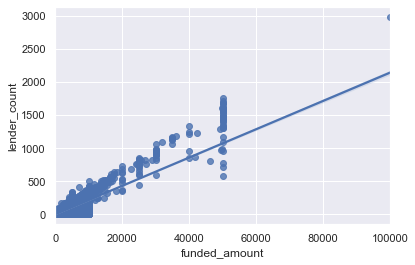

In [37]:
_ = sns.regplot(x='funded_amount', y='lender_count', data=loans_df)

In [38]:
np.corrcoef(loans_df.funded_amount, loans_df.lender_count)

array([[1.        , 0.84916769],
       [0.84916769, 1.        ]])

### Repayment interval

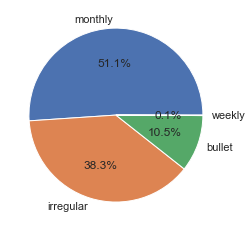

In [39]:
# Repayment interval distribution
labels = loans_df.repayment_interval.value_counts().index
sizes = loans_df.repayment_interval.value_counts()
_ = plt.pie(sizes, labels=labels, autopct='%1.1f%%')

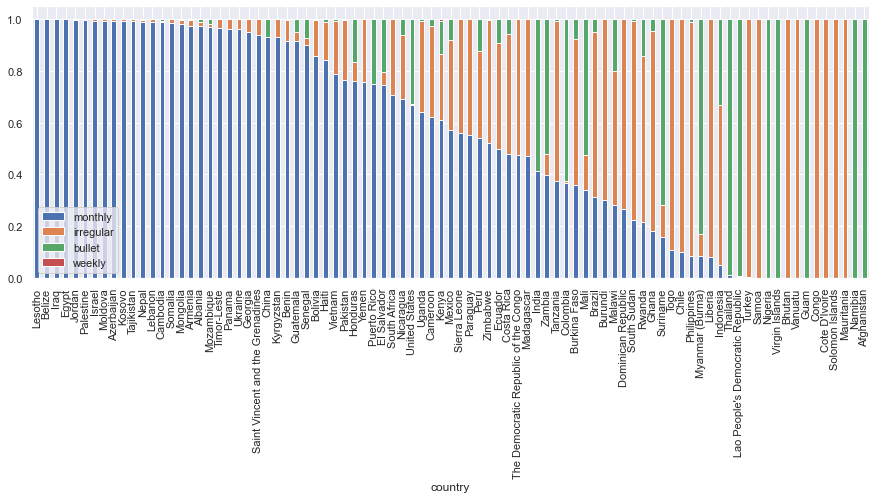

In [40]:
# Repayment interval distribution by country
repayment = loans_df.groupby(['country', 'repayment_interval']).size().unstack(fill_value=0)
repayment['loans_number'] = loans_df.groupby('country').count().loan_amount

# Calculate the proportion of different repayment methods and adjust the position of the columns
repayment_prop = repayment.iloc[:, [2,1,0,3]].div(repayment.loans_number, axis=0).sort_values(by='monthly', ascending=False)

# Plot the proportion by country
repayment_prop.plot(kind='bar', stacked=True)
plt.legend(loc='lower left')
plt.gcf().set_size_inches(15, 5)

### Posted time, funded time, and fully-funded days

In [41]:
# Build a new dataframe 
loans_posted = loans_df[['loan_amount', 'funded_amount', 'funded_loan_ratio', 'country', 'posted_time', 'funded_time', 'fully_funded_days']].set_index('posted_time', drop=False)

In [42]:
# Resample the time by month and calculate the number of loans
loans_monthly_count = loans_posted.resample('M', on='posted_time').count()[['posted_time', 'funded_time']]
loans_monthly_count.rename(columns={'posted_time': 'loans_posted','funded_time': 'loans_fully_funded'}, inplace=True)

# Add proportion of fully-funded loans number to posted loan number
loans_monthly_count['fully_funded_prop'] = round(loans_monthly_count.loans_fully_funded / loans_monthly_count.loans_posted, 2)
# Add proportion of missing funded_time number  to posted loan number, which euals one minus fully-funded loans proportion
loans_monthly_count['missing_funded_time_prop'] = loans_posted.funded_time.isna().resample('M').sum().div(loans_monthly_count.loans_posted).round(2)

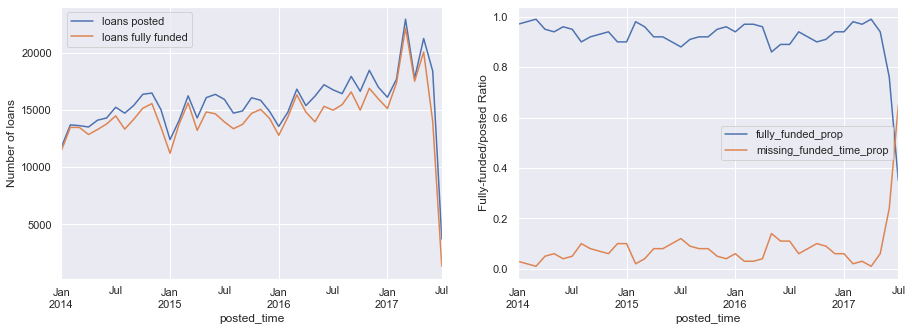

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# The number of loans posted and of the number of loans completely funded month by month
loans_monthly_count[['loans_posted', 'loans_fully_funded']].plot(ax=axes[0])
axes[0].legend(['loans posted', 'loans fully funded'])
axes[0].set_ylabel('Number of loans')

loans_monthly_count[['fully_funded_prop','missing_funded_time_prop']].plot(ax=axes[1])
_ = axes[1].set_ylabel('Fully-funded/posted Ratio')

In [44]:
loans_monthly_count.describe()

,loans_posted,loans_fully_funded,fully_funded_prop,missing_funded_time_prop
count,43.000000,43.000000,43.000000,43.000000
mean,15609.395349,14485.418605,0.917907,0.082093
std,2777.145650,2846.382133,0.097847,0.097847
min,3706.000000,1309.000000,0.350000,0.010000
25%,14512.000000,13482.500000,0.905000,0.040000
50%,15930.000000,14485.000000,0.940000,0.060000
75%,16701.000000,15392.000000,0.960000,0.095000
max,22951.000000,22171.000000,0.990000,0.650000


In [45]:
# Check the last 10 months
loans_monthly_count.tail(10)

,loans_posted,loans_fully_funded,fully_funded_prop,missing_funded_time_prop
posted_time,,,,
2016-10-31,16638,14988,0.90,0.10
2016-11-30,18474,16899,0.91,0.09
2016-12-31,16997,15970,0.94,0.06
2017-01-31,16114,15129,0.94,0.06
2017-02-28,17695,17361,0.98,0.02
2017-03-31,22951,22171,0.97,0.03
2017-04-30,17766,17518,0.99,0.01
2017-05-31,21262,20075,0.94,0.06
2017-06-30,18407,13986,0.76,0.24


It's obvious that the performance of last months in the dataset, 2017-07 and 2017-06, is very different from the previous months. Such low ratios of fully-funded loans to posted loans in the last two months result from the significantly increased missing values of `funded_time`, which can be explained in two ways:

* The loans did not get full funds before expiry
* The loans had no enough time to get full funds

Before we process the missing funded_time in the last two months, we need to check how long a loan can get fully funded.

count    622876.000000
mean         14.641581
std          14.399027
min           0.001389
25%           5.174308
50%           9.590156
75%          22.538565
max         420.573264
Name: fully_funded_days, dtype: float64


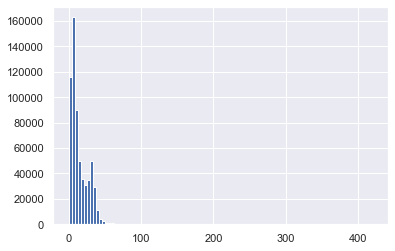

In [46]:
# The distribution and statistics of fully-funded days
_ = loans_posted.fully_funded_days.hist(bins=100)
print(loans_posted.fully_funded_days.describe())

The days of a loan getting fully funded range from less than 1 day to 420 days. According to [Kiva website](https://www.kiva.org/about/how), loans on Kiva usually have 30 days to successfully fundraise, and Kiva have expanded funding options for those loans missing their funding goals.

In [47]:
without_partner_usa = loans_df[loans_df.funded_time.notna() & loans_df.partner_id.isna() & (loans_df.ISO=='USA')][['loan_amount', 'fully_funded_days']]

In [48]:
without_partner_no_usa = loans_df[loans_df.funded_time.notna() & loans_df.partner_id.isna() & (loans_df.ISO!='USA')][['loan_amount', 'fully_funded_days']]

In [49]:
without_partner_usa.join(without_partner_no_usa, how='outer', lsuffix='_usa', rsuffix='no_usa').describe()

,loan_amount_usa,fully_funded_days_usa,loan_amountno_usa,fully_funded_daysno_usa
count,3096.000000,3096.000000,8255.000000,8255.000000
mean,5600.314922,44.160795,226.789824,50.330381
std,3061.366189,31.181764,486.080375,60.647753
min,200.000000,0.965833,25.000000,0.499757
25%,3000.000000,23.433397,125.000000,12.302969
50%,5000.000000,39.889288,125.000000,29.265012
75%,9931.250000,57.456823,250.000000,58.994572
max,10000.000000,400.314734,10000.000000,420.573264


In [50]:
(loans_df.funded_time.notna() & loans_df.partner_id.isna() & (loans_df.country=='United States')).sum()

3096

In [51]:
without_partner = loans_df[loans_df.funded_time.notna() & loans_df.partner_id.isna()][['loan_amount', 'fully_funded_days']]

In [52]:
with_partner = loans_df[loans_df.funded_time.notna() & loans_df.partner_id.notna()][['loan_amount', 'fully_funded_days']]

In [53]:
partner = with_partner.join(without_partner, how='outer', lsuffix='_w', rsuffix='_wo')

       loan_amount_w  loan_amount_wo
count  611522.000000    11351.000000
mean      781.763044     1692.425777
std      1084.434567     2907.831908
min        25.000000       25.000000
25%       250.000000      125.000000
50%       475.000000      250.000000
75%       900.000000     2000.000000
max    100000.000000    10000.000000


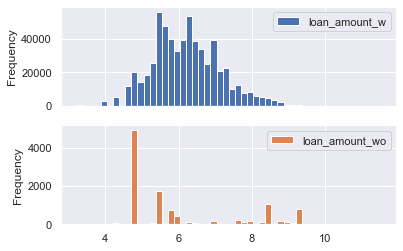

In [54]:
_ = np.log(partner[['loan_amount_w', 'loan_amount_wo']]).plot(subplots=True, kind='hist', bins=50)
print(partner[['loan_amount_w', 'loan_amount_wo']].describe())

       fully_funded_days_w  fully_funded_days_wo
count        611522.000000          11351.000000
mean             14.010363             48.647618
std              11.602194             54.291130
min               0.001389              0.499757
25%               5.122503             14.912552
50%               9.443015             33.396539
75%              21.986878             58.442263
max              83.030139            420.573264


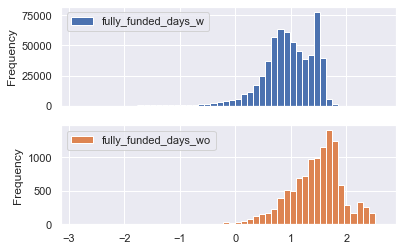

In [55]:
_ = np.log10(partner[['fully_funded_days_w', 'fully_funded_days_wo']]).plot(subplots=True, kind='hist', bins=50)
print(partner[['fully_funded_days_w', 'fully_funded_days_wo']].describe())

In [56]:
(with_partner.fully_funded_days > 30).mean()

0.14780662020336144

In [57]:
(without_partner.fully_funded_days > 30).mean()

0.5367809003612016

In [58]:
np.corrcoef(without_partner.loan_amount, without_partner.fully_funded_days)

array([[ 1.        , -0.04067207],
       [-0.04067207,  1.        ]])

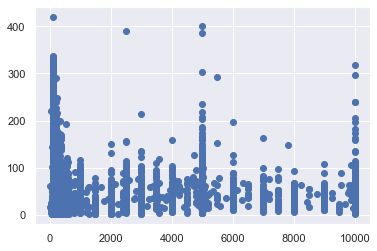

In [59]:
plt.scatter(without_partner.loan_amount, without_partner.fully_funded_days)

In [60]:
without_partner.groupby('loan_amount').max().fully_funded_days

loan_amount
25.0        61.909329
50.0       220.236806
75.0       143.174757
100.0       63.650046
125.0      420.573264
              ...    
9900.0      61.615104
9925.0      43.870822
9950.0      49.244051
9975.0      57.632535
10000.0    318.334190
Name: fully_funded_days, Length: 134, dtype: float64

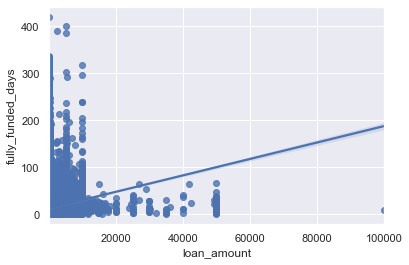

In [61]:
sns.regplot(x='loan_amount', y='fully_funded_days', data=loans_df)

In [62]:
np.corrcoef(np.log(loans_df[loans_df.fully_funded_days.notna()].fully_funded_days), np.log(loans_df[loans_df.fully_funded_days.notna()].loan_amount))

array([[1.        , 0.27829097],
       [0.27829097, 1.        ]])

**MPI additional datasets**

In [ ]:
mpi_2020 = pd.read_excel('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/RawData/AdditionalData/mpi_2020.xlsx')

In [68]:
mpi_nation = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/RawData/AdditionalData/MPI_subnational.csv', usecols=[0,1,2,3,4,5])

In [69]:
mpi_nation

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325
...,...,...,...,...,...,...
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164


In [85]:
mpi_ISO_list = list(mpi_nation['ISO country code'].unique())

In [86]:
loans_ISO_list = list(loans_df.ISO.unique())

In [87]:
ISO_not_in = [x for x in loans_ISO_list if x not in mpi_ISO_list]
ISO_not_in

['IND',
 'PSE',
 'USA',
 'CHL',
 'GEO',
 'UKR',
 'XKX',
 'ALB',
 'CRI',
 'SOM',
 'TUR',
 'AZE',
 'MEX',
 'KGZ',
 'ARM',
 'PRY',
 'LBN',
 'WSM',
 'ISR',
 'ZAF',
 'THA',
 'VUT',
 'PAN',
 'VIR',
 'VCT',
 'MDA',
 'SLB',
 'GUM',
 'PRI']